In [56]:
import os
from dotenv import load_dotenv
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt

# Carregar as variáveis de ambiente do arquivo .env
load_dotenv()

# Lendo as variáveis de ambiente
db_user = os.getenv('DB_USER')
db_password = os.getenv('DB_PASSWORD')
db_host = os.getenv('DB_HOST')
db_port = os.getenv('DB_PORT')
db_name = os.getenv('DB_NAME')

# Criando a string de conexão
connection_string = f'postgresql+psycopg2://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'

# Configurando a conexão com o PostgreSQL
engine = create_engine(connection_string)

# Configurando o pandas para mostrar todas as colunas
pd.set_option('display.max_columns', None)


In [57]:
query = '''
select em.cnpj_basico,
  em.razao_social,
  n.codigo as codigo_natureza_juridica,
  n.nome_natureza_juridica,
  q.codigo as codigo_qualificacao_socios,
  q.nome_qualificacao,
  em.capital_social,
  em.porte_da_empresa,
  case
    when em.porte_da_empresa = '00' then '00 – NÃO INFORMADO'
    when em.porte_da_empresa = '01' then '01 - MICRO EMPRESA'
    when em.porte_da_empresa = '03' then '03 - EMPRESA DE PEQUENO PORTE'
    when em.porte_da_empresa = '05' then '05 - DEMAIS'
    else '99 - DESCONHECIDO'
  end as nome_porte_empresa,
  et.cnpj_ordem,
  et.cnpj_dv,
  et.situacao_cadastral,
  case
    when et.situacao_cadastral = '01' then '01 – NULA'
    when et.situacao_cadastral = '2' then '2 – ATIVA'
    when et.situacao_cadastral = '3' then '3 – SUSPENSA'
    when et.situacao_cadastral = '4' then '4 – INAPTA'
    when et.situacao_cadastral = '08' then '08 – BAIXADA'
    else '99 - DESCONHECIDO'
  end as nome_situacao_cadastral,
  et.data_situacao_cadastral,
  et.data_inicio_atividade,
  et.motivo_situacao_cadastral,
  case
    when et.situacao_cadastral = '01' then '01 – NULA'
    when et.situacao_cadastral = '2' then '2 – ATIVA'
    when et.situacao_cadastral = '3' then '3 – SUSPENSA'
    when et.situacao_cadastral = '4' then '4 – INAPTA'
    when et.situacao_cadastral = '08' then '08 – BAIXADA'
    else '99 - DESCONHECIDO'
  end as nome_motivo_situacao_cadastral,  
  c.codigo as cnae,
  c.nome_cnae,
  et.bairro,
  et.cep,
  m.nome_cidade as municipio,
  et.uf,
  s.opcao_pelo_simples,
  s.data_de_opcao_pelo_simples,
  s.data_de_exclusao_do_simples,
  s.opcao_pelo_mei,
  s.data_de_opcao_pelo_mei,
  s.data_de_exclusao_do_mei
from empresas em
  left join estabelecimentos et on et.cnpj_basico = em.cnpj_basico
  left join simples s on s.cnpj_basico = em.cnpj_basico
  left join naturezas_juridicas n on n.codigo::text = em.natureza_juridica
  left join qualificacoes_socios q on q.codigo::text = em.qualificacao_dos_socios
  left join cnae c on c.codigo::text = et.cnae_fiscal_principal
  left join municipios m on m.codigo::text = et.municipio
where m.codigo = 6661
'''

In [58]:
# Ler os dados do banco de dados
dados_macatuba = pd.read_sql_query(query, engine)
dados_macatuba.shape

(5908, 29)

In [74]:
# Cria um csv com os dados tratados
dados_macatuba.to_csv('../dados_csv/dados_macatuba.csv', index=False)

In [59]:
# mostra todas as colunas
dados_macatuba.head()

,cnpj_basico,razao_social,codigo_natureza_juridica,nome_natureza_juridica,codigo_qualificacao_socios,nome_qualificacao,capital_social,porte_da_empresa,nome_porte_empresa,cnpj_ordem,cnpj_dv,situacao_cadastral,nome_situacao_cadastral,data_situacao_cadastral,data_inicio_atividade,motivo_situacao_cadastral,nome_motivo_situacao_cadastral,cnae,nome_cnae,bairro,cep,municipio,uf,opcao_pelo_simples,data_de_opcao_pelo_simples,data_de_exclusao_do_simples,opcao_pelo_mei,data_de_opcao_pelo_mei,data_de_exclusao_do_mei
0,00000000,BANCO DO BRASIL SA,2038,Sociedade de Economia Mista,10.0,Diretor,1.200000e+11,05,05 - DEMAIS,6397,53,08,08 – BAIXADA,2018-10-24,2009-04-16,01,08 – BAIXADA,6422100.0,"Bancos mltiplos, com carteira comercial",CENTRO,17290000,MACATUBA,SP,N,2007-07-01,2007-07-01,N,2009-07-01,2009-07-01
1,00000000,BANCO DO BRASIL SA,2038,Sociedade de Economia Mista,10.0,Diretor,1.200000e+11,05,05 - DEMAIS,3340,57,08,08 – BAIXADA,1993-11-10,1987-09-18,01,08 – BAIXADA,6421200.0,Bancos comerciais,Z RURAL,17290000,MACATUBA,SP,N,2007-07-01,2007-07-01,N,2009-07-01,2009-07-01
2,00000000,BANCO DO BRASIL SA,2038,Sociedade de Economia Mista,10.0,Diretor,1.200000e+11,05,05 - DEMAIS,5567,00,02,99 - DESCONHECIDO,2005-11-03,2004-08-25,00,99 - DESCONHECIDO,6422100.0,"Bancos mltiplos, com carteira comercial",CENTRO,17290000,MACATUBA,SP,N,2007-07-01,2007-07-01,N,2009-07-01,2009-07-01
3,00003233,FERNANDES & LUCIANO CASA DE CARNES LTDA,2062,Sociedade Empresria Limitada,49.0,Scio-Administrador,2.500000e+04,01,01 - MICRO EMPRESA,0001,48,04,99 - DESCONHECIDO,2020-10-23,1994-05-12,63,99 - DESCONHECIDO,4722901.0,Comrcio varejista de carnes - aougues,JARDIM AMERICA,17290000,MACATUBA,SP,N,2009-01-01,2017-12-31,N,NaT,NaT
4,00017642,ANTONIO CARLOS MARTINS TREVELINI,2135,Empresrio (Individual),50.0,Empresrio,0.000000e+00,01,01 - MICRO EMPRESA,0001,01,04,99 - DESCONHECIDO,2021-02-03,1994-06-13,63,99 - DESCONHECIDO,4789099.0,Comrcio varejista de outros produtos no especi...,JD. VENEZA II,17290000,MACATUBA,SP,S,2007-07-01,NaT,N,NaT,NaT


In [60]:
df_empresas_inativas = dados_macatuba[dados_macatuba['situacao_cadastral'] == '08']
df_empresas_inativas.shape

(2990, 29)

In [61]:
dados_macatuba.groupby('nome_situacao_cadastral').size()

nome_situacao_cadastral
01 – NULA               5
08 – BAIXADA         2990
99 - DESCONHECIDO    2913
dtype: int64

In [62]:
df_empresas_inativas.head()

,cnpj_basico,razao_social,codigo_natureza_juridica,nome_natureza_juridica,codigo_qualificacao_socios,nome_qualificacao,capital_social,porte_da_empresa,nome_porte_empresa,cnpj_ordem,cnpj_dv,situacao_cadastral,nome_situacao_cadastral,data_situacao_cadastral,data_inicio_atividade,motivo_situacao_cadastral,nome_motivo_situacao_cadastral,cnae,nome_cnae,bairro,cep,municipio,uf,opcao_pelo_simples,data_de_opcao_pelo_simples,data_de_exclusao_do_simples,opcao_pelo_mei,data_de_opcao_pelo_mei,data_de_exclusao_do_mei
0,00000000,BANCO DO BRASIL SA,2038,Sociedade de Economia Mista,10.0,Diretor,1.200000e+11,05,05 - DEMAIS,6397,53,08,08 – BAIXADA,2018-10-24,2009-04-16,01,08 – BAIXADA,6422100.0,"Bancos mltiplos, com carteira comercial",CENTRO,17290000,MACATUBA,SP,N,2007-07-01,2007-07-01,N,2009-07-01,2009-07-01
1,00000000,BANCO DO BRASIL SA,2038,Sociedade de Economia Mista,10.0,Diretor,1.200000e+11,05,05 - DEMAIS,3340,57,08,08 – BAIXADA,1993-11-10,1987-09-18,01,08 – BAIXADA,6421200.0,Bancos comerciais,Z RURAL,17290000,MACATUBA,SP,N,2007-07-01,2007-07-01,N,2009-07-01,2009-07-01
7,00199639,ARMANDO RUIZ MACATUBA,2135,Empresrio (Individual),50.0,Empresrio,0.000000e+00,01,01 - MICRO EMPRESA,0001,48,08,08 – BAIXADA,2009-10-22,1994-09-08,01,08 – BAIXADA,5611203.0,"Lanchonetes, casas de ch, de sucos e similares",JD PANORAMA,17290000,MACATUBA,SP,N,2007-07-01,2009-10-22,N,NaT,NaT
8,00392078,ENGELMANN & CIA LTDA,2062,Sociedade Empresria Limitada,49.0,Scio-Administrador,0.000000e+00,01,01 - MICRO EMPRESA,0001,07,08,08 – BAIXADA,2016-11-16,1994-12-29,01,08 – BAIXADA,7119703.0,Servios de desenho tcnico relacionados arquit...,CENTRO,17290000,MACATUBA,SP,N,2011-01-01,2016-11-16,N,NaT,NaT
9,00438391,BRAGUIN & FILHOS LTDA,2062,Sociedade Empresria Limitada,49.0,Scio-Administrador,0.000000e+00,01,01 - MICRO EMPRESA,0001,20,08,08 – BAIXADA,2010-10-04,1995-02-03,01,08 – BAIXADA,4729699.0,Comrcio varejista de produtos alimentcios em g...,VL.NOVA,17290000,MACATUBA,SP,N,2007-07-01,2010-10-04,N,NaT,NaT


In [63]:
df_empresas_inativas.groupby('nome_natureza_juridica').size()

nome_natureza_juridica
Associao Privada                                                             63
Candidato a Cargo Poltico Eletivo                                           628
Cooperativa                                                                   9
Empresa Individual Imobiliria                                                12
Empresa Individual de Responsabilidade Limitada (de Natureza Empresria)       5
Empresrio (Individual)                                                     1651
Organizao Religiosa                                                           3
Produtor Rural (Pessoa Fsica)                                               181
Sociedade Annima Aberta                                                       8
Sociedade Annima Fechada                                                     30
Sociedade Empresria Limitada                                                350
Sociedade Empresria em Nome Coletivo                                          3
Sociedade Mercant

In [64]:
duplicated_columns = df_empresas_inativas.columns[df_empresas_inativas.columns.duplicated()]
print(f"Colunas duplicadas: {duplicated_columns}")

Colunas duplicadas: Index([], dtype='object')


In [65]:
# - Criar coluna com o ano de fechamento e o tempo de funcionamento (data de fechamento – data de abertura)
df_empresas_inativas['ano_fechamento'] = pd.to_datetime(df_empresas_inativas['data_situacao_cadastral'], format='%Y%m%d').dt.year
df_empresas_inativas['ano_abertura'] = pd.to_datetime(df_empresas_inativas['data_inicio_atividade'], format='%Y%m%d').dt.year
df_empresas_inativas.head()

/tmp/ipykernel_20775/4012839374.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_empresas_inativas['ano_fechamento'] = pd.to_datetime(df_empresas_inativas['data_situacao_cadastral'], format='%Y%m%d').dt.year
/tmp/ipykernel_20775/4012839374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_empresas_inativas['ano_abertura'] = pd.to_datetime(df_empresas_inativas['data_inicio_atividade'], format='%Y%m%d').dt.year


,cnpj_basico,razao_social,codigo_natureza_juridica,nome_natureza_juridica,codigo_qualificacao_socios,nome_qualificacao,capital_social,porte_da_empresa,nome_porte_empresa,cnpj_ordem,cnpj_dv,situacao_cadastral,nome_situacao_cadastral,data_situacao_cadastral,data_inicio_atividade,motivo_situacao_cadastral,nome_motivo_situacao_cadastral,cnae,nome_cnae,bairro,cep,municipio,uf,opcao_pelo_simples,data_de_opcao_pelo_simples,data_de_exclusao_do_simples,opcao_pelo_mei,data_de_opcao_pelo_mei,data_de_exclusao_do_mei,ano_fechamento,ano_abertura
0,00000000,BANCO DO BRASIL SA,2038,Sociedade de Economia Mista,10.0,Diretor,1.200000e+11,05,05 - DEMAIS,6397,53,08,08 – BAIXADA,2018-10-24,2009-04-16,01,08 – BAIXADA,6422100.0,"Bancos mltiplos, com carteira comercial",CENTRO,17290000,MACATUBA,SP,N,2007-07-01,2007-07-01,N,2009-07-01,2009-07-01,2018,2009
1,00000000,BANCO DO BRASIL SA,2038,Sociedade de Economia Mista,10.0,Diretor,1.200000e+11,05,05 - DEMAIS,3340,57,08,08 – BAIXADA,1993-11-10,1987-09-18,01,08 – BAIXADA,6421200.0,Bancos comerciais,Z RURAL,17290000,MACATUBA,SP,N,2007-07-01,2007-07-01,N,2009-07-01,2009-07-01,1993,1987
7,00199639,ARMANDO RUIZ MACATUBA,2135,Empresrio (Individual),50.0,Empresrio,0.000000e+00,01,01 - MICRO EMPRESA,0001,48,08,08 – BAIXADA,2009-10-22,1994-09-08,01,08 – BAIXADA,5611203.0,"Lanchonetes, casas de ch, de sucos e similares",JD PANORAMA,17290000,MACATUBA,SP,N,2007-07-01,2009-10-22,N,NaT,NaT,2009,1994
8,00392078,ENGELMANN & CIA LTDA,2062,Sociedade Empresria Limitada,49.0,Scio-Administrador,0.000000e+00,01,01 - MICRO EMPRESA,0001,07,08,08 – BAIXADA,2016-11-16,1994-12-29,01,08 – BAIXADA,7119703.0,Servios de desenho tcnico relacionados arquit...,CENTRO,17290000,MACATUBA,SP,N,2011-01-01,2016-11-16,N,NaT,NaT,2016,1994
9,00438391,BRAGUIN & FILHOS LTDA,2062,Sociedade Empresria Limitada,49.0,Scio-Administrador,0.000000e+00,01,01 - MICRO EMPRESA,0001,20,08,08 – BAIXADA,2010-10-04,1995-02-03,01,08 – BAIXADA,4729699.0,Comrcio varejista de produtos alimentcios em g...,VL.NOVA,17290000,MACATUBA,SP,N,2007-07-01,2010-10-04,N,NaT,NaT,2010,1995


In [66]:
# - Criar coluna com o tempo de funcionamento (data de fechamento – data de abertura)

# Converter as colunas 'data_situacao_cadastral' e 'data_inicio_atividade' para datetime
df_empresas_inativas['data_situacao_cadastral'] = pd.to_datetime(df_empresas_inativas['data_situacao_cadastral'], format='%Y%m%d')
#df_empresas_inativas['data_inicio_atividade'] = pd.to_datetime(df_empresas_inativas['data_inicio_atividade'], format='%Y%m%d')

# Calcular o tempo de funcionamento
df_empresas_inativas['tempo_funcionamento'] = df_empresas_inativas['data_situacao_cadastral'] - df_empresas_inativas['data_inicio_atividade']

# Mostrar as primeiras linhas do DataFrame
df_empresas_inativas.head()

/tmp/ipykernel_20775/2806412043.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_empresas_inativas['data_situacao_cadastral'] = pd.to_datetime(df_empresas_inativas['data_situacao_cadastral'], format='%Y%m%d')
/tmp/ipykernel_20775/2806412043.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_empresas_inativas['tempo_funcionamento'] = df_empresas_inativas['data_situacao_cadastral'] - df_empresas_inativas['data_inicio_atividade']


,cnpj_basico,razao_social,codigo_natureza_juridica,nome_natureza_juridica,codigo_qualificacao_socios,nome_qualificacao,capital_social,porte_da_empresa,nome_porte_empresa,cnpj_ordem,cnpj_dv,situacao_cadastral,nome_situacao_cadastral,data_situacao_cadastral,data_inicio_atividade,motivo_situacao_cadastral,nome_motivo_situacao_cadastral,cnae,nome_cnae,bairro,cep,municipio,uf,opcao_pelo_simples,data_de_opcao_pelo_simples,data_de_exclusao_do_simples,opcao_pelo_mei,data_de_opcao_pelo_mei,data_de_exclusao_do_mei,ano_fechamento,ano_abertura,tempo_funcionamento
0,00000000,BANCO DO BRASIL SA,2038,Sociedade de Economia Mista,10.0,Diretor,1.200000e+11,05,05 - DEMAIS,6397,53,08,08 – BAIXADA,2018-10-24,2009-04-16,01,08 – BAIXADA,6422100.0,"Bancos mltiplos, com carteira comercial",CENTRO,17290000,MACATUBA,SP,N,2007-07-01,2007-07-01,N,2009-07-01,2009-07-01,2018,2009,3478 days
1,00000000,BANCO DO BRASIL SA,2038,Sociedade de Economia Mista,10.0,Diretor,1.200000e+11,05,05 - DEMAIS,3340,57,08,08 – BAIXADA,1993-11-10,1987-09-18,01,08 – BAIXADA,6421200.0,Bancos comerciais,Z RURAL,17290000,MACATUBA,SP,N,2007-07-01,2007-07-01,N,2009-07-01,2009-07-01,1993,1987,2245 days
7,00199639,ARMANDO RUIZ MACATUBA,2135,Empresrio (Individual),50.0,Empresrio,0.000000e+00,01,01 - MICRO EMPRESA,0001,48,08,08 – BAIXADA,2009-10-22,1994-09-08,01,08 – BAIXADA,5611203.0,"Lanchonetes, casas de ch, de sucos e similares",JD PANORAMA,17290000,MACATUBA,SP,N,2007-07-01,2009-10-22,N,NaT,NaT,2009,1994,5523 days
8,00392078,ENGELMANN & CIA LTDA,2062,Sociedade Empresria Limitada,49.0,Scio-Administrador,0.000000e+00,01,01 - MICRO EMPRESA,0001,07,08,08 – BAIXADA,2016-11-16,1994-12-29,01,08 – BAIXADA,7119703.0,Servios de desenho tcnico relacionados arquit...,CENTRO,17290000,MACATUBA,SP,N,2011-01-01,2016-11-16,N,NaT,NaT,2016,1994,7993 days
9,00438391,BRAGUIN & FILHOS LTDA,2062,Sociedade Empresria Limitada,49.0,Scio-Administrador,0.000000e+00,01,01 - MICRO EMPRESA,0001,20,08,08 – BAIXADA,2010-10-04,1995-02-03,01,08 – BAIXADA,4729699.0,Comrcio varejista de produtos alimentcios em g...,VL.NOVA,17290000,MACATUBA,SP,N,2007-07-01,2010-10-04,N,NaT,NaT,2010,1995,5722 days


In [67]:
import pandas as pd

# Converter as colunas 'data_situacao_cadastral' e 'data_inicio_atividade' para datetime
df_empresas_inativas['data_situacao_cadastral'] = pd.to_datetime(df_empresas_inativas['data_situacao_cadastral'], format='%Y%m%d')
df_empresas_inativas['data_inicio_atividade'] = pd.to_datetime(df_empresas_inativas['data_inicio_atividade'], format='%Y%m%d')

# Calcular o tempo de funcionamento
df_empresas_inativas['tempo_funcionamento'] = df_empresas_inativas['data_situacao_cadastral'] - df_empresas_inativas['data_inicio_atividade']

# Mostrar as primeiras linhas do DataFrame
df_empresas_inativas.head()

/tmp/ipykernel_20775/1655949497.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_empresas_inativas['data_situacao_cadastral'] = pd.to_datetime(df_empresas_inativas['data_situacao_cadastral'], format='%Y%m%d')
/tmp/ipykernel_20775/1655949497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_empresas_inativas['data_inicio_atividade'] = pd.to_datetime(df_empresas_inativas['data_inicio_atividade'], format='%Y%m%d')
/tmp/ipykernel_20775/1655949497.py:8: SettingWithCopyWarning: 
A value is trying to be

,cnpj_basico,razao_social,codigo_natureza_juridica,nome_natureza_juridica,codigo_qualificacao_socios,nome_qualificacao,capital_social,porte_da_empresa,nome_porte_empresa,cnpj_ordem,cnpj_dv,situacao_cadastral,nome_situacao_cadastral,data_situacao_cadastral,data_inicio_atividade,motivo_situacao_cadastral,nome_motivo_situacao_cadastral,cnae,nome_cnae,bairro,cep,municipio,uf,opcao_pelo_simples,data_de_opcao_pelo_simples,data_de_exclusao_do_simples,opcao_pelo_mei,data_de_opcao_pelo_mei,data_de_exclusao_do_mei,ano_fechamento,ano_abertura,tempo_funcionamento
0,00000000,BANCO DO BRASIL SA,2038,Sociedade de Economia Mista,10.0,Diretor,1.200000e+11,05,05 - DEMAIS,6397,53,08,08 – BAIXADA,2018-10-24,2009-04-16,01,08 – BAIXADA,6422100.0,"Bancos mltiplos, com carteira comercial",CENTRO,17290000,MACATUBA,SP,N,2007-07-01,2007-07-01,N,2009-07-01,2009-07-01,2018,2009,3478 days
1,00000000,BANCO DO BRASIL SA,2038,Sociedade de Economia Mista,10.0,Diretor,1.200000e+11,05,05 - DEMAIS,3340,57,08,08 – BAIXADA,1993-11-10,1987-09-18,01,08 – BAIXADA,6421200.0,Bancos comerciais,Z RURAL,17290000,MACATUBA,SP,N,2007-07-01,2007-07-01,N,2009-07-01,2009-07-01,1993,1987,2245 days
7,00199639,ARMANDO RUIZ MACATUBA,2135,Empresrio (Individual),50.0,Empresrio,0.000000e+00,01,01 - MICRO EMPRESA,0001,48,08,08 – BAIXADA,2009-10-22,1994-09-08,01,08 – BAIXADA,5611203.0,"Lanchonetes, casas de ch, de sucos e similares",JD PANORAMA,17290000,MACATUBA,SP,N,2007-07-01,2009-10-22,N,NaT,NaT,2009,1994,5523 days
8,00392078,ENGELMANN & CIA LTDA,2062,Sociedade Empresria Limitada,49.0,Scio-Administrador,0.000000e+00,01,01 - MICRO EMPRESA,0001,07,08,08 – BAIXADA,2016-11-16,1994-12-29,01,08 – BAIXADA,7119703.0,Servios de desenho tcnico relacionados arquit...,CENTRO,17290000,MACATUBA,SP,N,2011-01-01,2016-11-16,N,NaT,NaT,2016,1994,7993 days
9,00438391,BRAGUIN & FILHOS LTDA,2062,Sociedade Empresria Limitada,49.0,Scio-Administrador,0.000000e+00,01,01 - MICRO EMPRESA,0001,20,08,08 – BAIXADA,2010-10-04,1995-02-03,01,08 – BAIXADA,4729699.0,Comrcio varejista de produtos alimentcios em g...,VL.NOVA,17290000,MACATUBA,SP,N,2007-07-01,2010-10-04,N,NaT,NaT,2010,1995,5722 days


<Axes: >

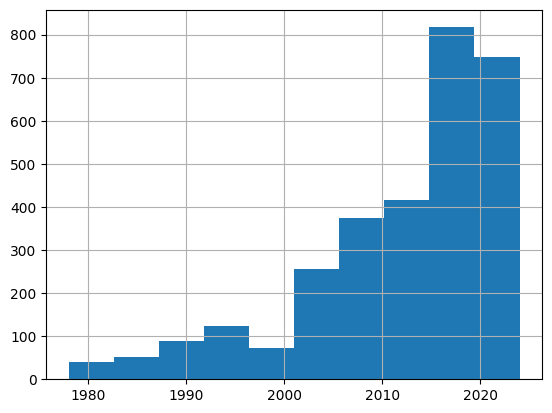

In [68]:
df_empresas_inativas.groupby('ano_fechamento').size()

# criar gráfico de histograma com numero de empresas fechadas por ano
df_empresas_inativas['ano_fechamento'].hist()

/tmp/ipykernel_20775/501806795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_empresas_inativas['tempo_funcionamento_anos'] = df_empresas_inativas['tempo_funcionamento'].dt.days / 365


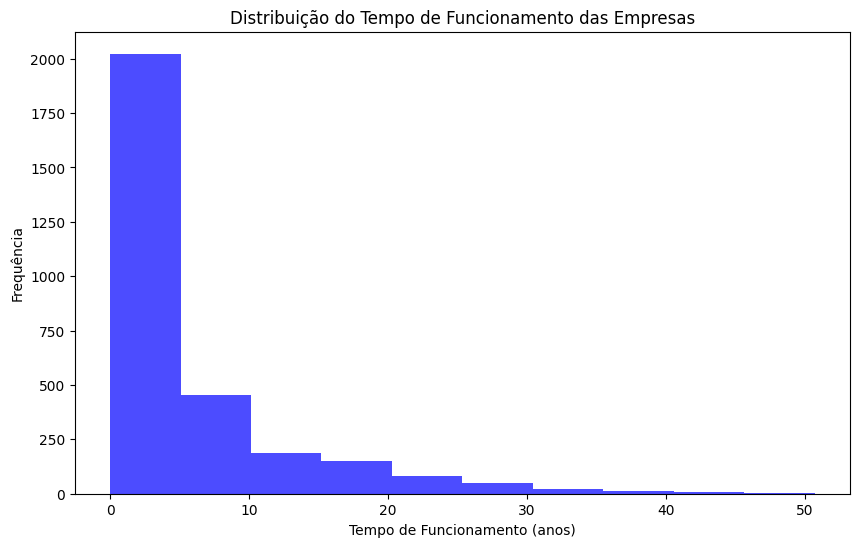

In [73]:
plt.figure(figsize=(10, 6))
df_empresas_inativas['tempo_funcionamento_anos'] = df_empresas_inativas['tempo_funcionamento'].dt.days / 365
df_empresas_inativas['tempo_funcionamento_anos'].hist(color='blue', alpha=0.7)
plt.title('Distribuição do Tempo de Funcionamento das Empresas')
plt.xlabel('Tempo de Funcionamento (anos)')
plt.ylabel('Frequência')
plt.grid(False)
plt.show()